## Introdução
Neste projeto, abordamos um processo completo de análise exploratória e preparação de dados voltado à identificação de perfis de candidatos com maior potencial de contratação, com base em variáveis relevantes fornecidas durante a inscrição. Foram realizadas etapas de tratamento de dados faltantes, análise multivariada, codificação de variáveis e, por fim, definição de critérios para segmentação dos candidatos em três níveis distintos de atratividade. 

*Essa categorização foi feita com base em regras de negócio construídas a partir de padrões identificados durante a análise, visando oferecer um suporte mais estratégico ao time de Recursos Humanos na triagem e priorização de perfis.*



## Contexto do projeto
No contexto do projeto, exploraremos um cenário fictício em que uma empresa da área de Big Data e Data Science busca novos talentos para integrar sua equipe. Para isso, oferece treinamentos avançados a profissionais interessados em atuar na área.

Com um número crescente de inscritos, surge a necessidade de entender melhor o perfil dos participantes: quem realmente deseja trabalhar na empresa após o treinamento e quem busca apenas aprimorar suas habilidades para outras oportunidades. A partir das informações fornecidas na inscrição — como dados demográficos, formação e experiência — **a proposta é realizar uma análise que ajude o time de Recursos Humanos a tomar decisões mais estratégicas, otimizando o processo seletivo e a estruturação dos cursos**.

### Importação e tratamento de dados
Os dados utilizados neste projeto foram obtidos por meio da comunidade Kaggle e estão disponíveis publicamente desde 2020, podendo ser acessados [neste link](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists/data).


In [478]:
# Importando as bibliotecas necessárias ao projeto
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [479]:
# Importação de dados
df_Train = pd.read_csv('Material/aug_train.csv', sep=',')
df_Train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [480]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Dicionário das variáveis

- **enrollee_id** - Identificador único do candidato
- **city** - Código da cidade
- **city_development_index** - Índice de desenvolvimento da cidade
- **gender** - Gênero
- **relevent_experience** - Experiência relevante do candidato
- **education_level** - Nível educacional
- **enrolled_university** - Tipo de curso matriculado
- **major_discipline** - Área de estudo do candidato
- **experience** - Experiência prévia em anos
- **company_size** - Quantidade de funcionários do emprego atual
- **company_type** - Tipo de empresa que trabalha atualmente
- **last_new_job** - Diferença em anos entre o emprego atual e último
- **trainig_hours** - Horas de treinamento concluídas
- **target** - Variável alvo, onde 0 representa "Não busca mudança de emprego" e 1 "Busca mudança de emprego".

### Após o entendimento das variáveis, vamos a algumas das medidas das base de dados

In [481]:
#Describe() das variáveis numéricas
df_Train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


*O City Development Index (CDI) é uma métrica que representa o nível de desenvolvimento urbano com base em diferentes indicadores (de acordo com o **Programa das Nações Unidas para os Assentamentos Humanos UN-HAB**). Seus valores variam de 0 a 1, onde 0 representa o desenvolvimento mínimo ou nenhum desenvolvimento, e 1 representa o desenvolvimento máximo.*

Além disso, vamos avaliar algumas das variáveis numéricas:

Avaliando o **city_development_index** temos:
- Média de 0,83
- Desvio padrão de 0,123
- Mediana de 0,903

O que nos remete a que a maioria dos candidativos vêm de cidades bem desenvolvidas

Em **training_hours** nós temos:
- Média de 65,36
- Mediana de 47,00
- Valor máximo de 336

Temos mais candidatos com poucas horas de treinamento do que muitas, mas, além disso, é interessante notar que alguns deles gastam muito tempo em treinamento.

In [482]:
#Describe das variáveis object
df_Train.describe(include=object).T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


In [483]:
# Com o describe das colunas object, é possível notar que há vários dados faltantes. Vamos analisá-los:
#Primeiro, vamos ver os dados únicos disponíveis por coluna

for col in df_Train.columns:
    print(f'Coluna: {col}')
    print(df_Train[col].unique())
    print(f'- ' * 10)

Coluna: enrollee_id
[ 8949 29725 11561 ... 24576  5756 23834]
- - - - - - - - - - 
Coluna: city
['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_

In [484]:
#Agora, veremos os dados nulos, vazios e duplicados por coluna
for col in df_Train.columns:
    nulos = df_Train[col].isna().sum()
    vazios = (df_Train[col] == "").sum()
    duplicados = df_Train[col].duplicated().sum()

    print(f'Coluna: {col}')
    print(f'→ Dados nulos (NaN): {nulos}')
    print(f'→ Dados vazios (""): {vazios}')
    print(f'→ Dados duplicados (""): {duplicados}')
    print('-' * 10)

Coluna: enrollee_id
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 0
----------
Coluna: city
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 19035
----------
Coluna: city_development_index
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 19065
----------
Coluna: gender
→ Dados nulos (NaN): 4508
→ Dados vazios (""): 0
→ Dados duplicados (""): 19154
----------
Coluna: relevent_experience
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 19156
----------
Coluna: enrolled_university
→ Dados nulos (NaN): 386
→ Dados vazios (""): 0
→ Dados duplicados (""): 19154
----------
Coluna: education_level
→ Dados nulos (NaN): 460
→ Dados vazios (""): 0
→ Dados duplicados (""): 19152
----------
Coluna: major_discipline
→ Dados nulos (NaN): 2813
→ Dados vazios (""): 0
→ Dados duplicados (""): 19151
----------
Coluna: experience
→ Dados nulos (NaN): 65
→ Dados vazios (""): 0
→ Dados duplicados (""): 19135
---------

### Conclusões dos **dados nulos, vazios e duplicados**:

- **Dados Nulos**: trataremos os valores ausentes por coluna, visto que cada uma pode ter uma abordagem diferente
- **Dados Vazios**: não temos
- **Dados Duplicados**: apesar de ter diversos dados duplicados, todos se dão pela quantidade finita de opções possíveis para preencher o formulário de cadastro, como a nossa variável **enrollee_id**, que é nosso identificador, não possui dados duplicados, não precisamos nos preocupar

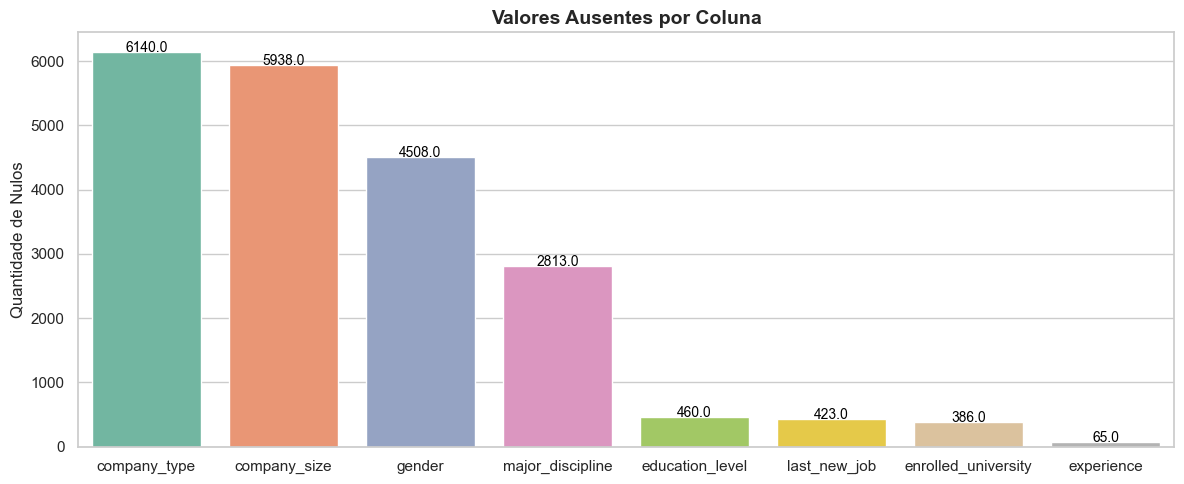

In [485]:
df_Nulos = df_Train.isna().sum().reset_index()
df_Nulos.columns = ['Coluna', 'Nulos']
df_Nulos['Percentual'] = (df_Nulos['Nulos'] / len(df_Train)) * 100
df_Nulos = df_Nulos[df_Nulos['Nulos'] > 0]  # Exibe apenas colunas com nulos

# Ordena por número de nulos (opcional)
df_Nulos = df_Nulos.sort_values(by='Nulos', ascending=False)

# Estética do gráfico
plt.figure(figsize=(12, 5))
sns.set(style="whitegrid")

ax = sns.barplot(data=df_Nulos, x='Coluna', y='Nulos', palette='Set2')

# Títulos e eixos
plt.title('Valores Ausentes por Coluna', fontsize=14, fontweight='bold')
plt.ylabel('Quantidade de Nulos')
plt.xlabel('')

# Anotando valores absolutos e percentuais
max_val = df_Nulos['Nulos'].max()
x_offset = max_val * 0.01  # deslocamento horizontal

for c in ax.patches:
    ax.annotate(f'\n{c.get_height()}', (c.get_x()+0.4, (c.get_height())), ha='center', color='black', size=10)



plt.tight_layout()
plt.show()

### Tratamento de dados ausentes

#### Gênero (gender)

In [486]:
print('Distribuição da coluna Gênero:\n')
for valor, quantidade in df_Train['gender'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Distribuição da coluna Gênero:

Valor: Male | Quantidade: 13221 | Percentual: 69.01%
Valor: nan | Quantidade: 4508 | Percentual: 23.53%
Valor: Female | Quantidade: 1238 | Percentual: 6.46%
Valor: Other | Quantidade: 191 | Percentual: 1.00%


In [487]:
# Como gênero não é uma coluna eliminatória, vamos alterar os dados vazios para Other
df_Train['gender'] = df_Train['gender'].fillna('Other')
df_Train['gender'].value_counts()

Male      13221
Other      4699
Female     1238
Name: gender, dtype: int64

#### Tipo de curso matriculado (enrolled_university)

In [488]:
for valor, quantidade in df_Train['enrolled_university'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: no_enrollment | Quantidade: 13817 | Percentual: 72.12%
Valor: Full time course | Quantidade: 3757 | Percentual: 19.61%
Valor: Part time course | Quantidade: 1198 | Percentual: 6.25%
Valor: nan | Quantidade: 386 | Percentual: 2.01%


In [489]:
# Sabendo que os dados nulos da coluna tem um percentual pequeno (< 3%), vamos distribuí-los igualmente entre as outras 3 variáveis
#Criando uma lista com os 3 valores repetidos
ValoresPreencher = ['no_enrollment', 'Full time course', 'Part time course']

#Localizando os índices dos valores nulos
IndicesNulosUniversidade = df_Train[df_Train['enrolled_university'].isna()].index

#Garantindo o mesmo tamanho da lista e nulos
valoresRepetidos = ValoresPreencher * (len(IndicesNulosUniversidade) // 3 + 1)
valoresRepetidos = valoresRepetidos[:len(IndicesNulosUniversidade)]

#Preenchendo proporcionalmente os valores nulos entre as três variáveis possíveis
df_Train.loc[IndicesNulosUniversidade, 'enrolled_university'] = valoresRepetidos

In [490]:
for valor, quantidade in df_Train['enrolled_university'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: no_enrollment | Quantidade: 13946 | Percentual: 72.79%
Valor: Full time course | Quantidade: 3886 | Percentual: 20.28%
Valor: Part time course | Quantidade: 1326 | Percentual: 6.92%


#### Nível educacional (education_level)


In [491]:
for valor, quantidade in df_Train['education_level'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: Graduate | Quantidade: 11598 | Percentual: 60.54%
Valor: Masters | Quantidade: 4361 | Percentual: 22.76%
Valor: High School | Quantidade: 2017 | Percentual: 10.53%
Valor: nan | Quantidade: 460 | Percentual: 2.40%
Valor: Phd | Quantidade: 414 | Percentual: 2.16%
Valor: Primary School | Quantidade: 308 | Percentual: 1.61%


In [492]:
# Como candidatos que estão na Primary School são desclassificados automaticamente, alteraremos os nulos como High School para não eliminarmos os candidatos e, durante o processo seletivo, o candidato terá que apresentar o certificado de conclusão de ensino (seja de Primary ou High School, Graduate, Masters ou PHD)

df_Train['education_level'] = df_Train['education_level'].fillna('High School')
df_Train['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2477
Phd                 414
Primary School      308
Name: education_level, dtype: int64

#### Área de estudo do candidato (major_discipline)


In [493]:
for valor, quantidade in df_Train['major_discipline'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: STEM | Quantidade: 14492 | Percentual: 75.64%
Valor: nan | Quantidade: 2813 | Percentual: 14.68%
Valor: Humanities | Quantidade: 669 | Percentual: 3.49%
Valor: Other | Quantidade: 381 | Percentual: 1.99%
Valor: Business Degree | Quantidade: 327 | Percentual: 1.71%
Valor: Arts | Quantidade: 253 | Percentual: 1.32%
Valor: No Major | Quantidade: 223 | Percentual: 1.16%


In [494]:
# Como temos 2.813 dados nulos na variável major_discipline e, 2.785 de Primary e High School na variável education_level, vamos alterar os dados nulos de major_discipline para "Non Degree", pois fica como se o candidato não possuisse um curso de gradução (o que condiz que o nível educacional dos candidatos que estão no primário ou ensino médio). Além disso, há uma diferença de 28 candidatos que não estão no High School ou Primary School, portanto, este remanescente iremos incluir como "Other"

#Calculando os dados nulos
nulosMajor = df_Train[df_Train['major_discipline'].isna()]

#Filtrando os índices de Primary e High School da coluna 'education_level' 
indiceSemGraduacao = nulosMajor[nulosMajor['education_level'].isin(['Primary School', 'High School'])].index

#Atribuindo "Non Degree" para esses índices
df_Train.loc[indiceSemGraduacao, 'major_discipline'] = "Non Degree"

#Atribuindo "Other" para os remanescentes
indiceNulosMajor = df_Train[df_Train['major_discipline'].isna()].index
df_Train.loc[indiceNulosMajor, 'major_discipline'] = "Other"

In [495]:
for valor, quantidade in df_Train['major_discipline'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: STEM | Quantidade: 14492 | Percentual: 75.64%
Valor: Non Degree | Quantidade: 2785 | Percentual: 14.54%
Valor: Humanities | Quantidade: 669 | Percentual: 3.49%
Valor: Other | Quantidade: 409 | Percentual: 2.13%
Valor: Business Degree | Quantidade: 327 | Percentual: 1.71%
Valor: Arts | Quantidade: 253 | Percentual: 1.32%
Valor: No Major | Quantidade: 223 | Percentual: 1.16%


#### Experiência do candidato (experience)

In [496]:
for valor, quantidade in df_Train['experience'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: >20 | Quantidade: 3286 | Percentual: 17.15%
Valor: 5 | Quantidade: 1430 | Percentual: 7.46%
Valor: 4 | Quantidade: 1403 | Percentual: 7.32%
Valor: 3 | Quantidade: 1354 | Percentual: 7.07%
Valor: 6 | Quantidade: 1216 | Percentual: 6.35%
Valor: 2 | Quantidade: 1127 | Percentual: 5.88%
Valor: 7 | Quantidade: 1028 | Percentual: 5.37%
Valor: 10 | Quantidade: 985 | Percentual: 5.14%
Valor: 9 | Quantidade: 980 | Percentual: 5.12%
Valor: 8 | Quantidade: 802 | Percentual: 4.19%
Valor: 15 | Quantidade: 686 | Percentual: 3.58%
Valor: 11 | Quantidade: 664 | Percentual: 3.47%
Valor: 14 | Quantidade: 586 | Percentual: 3.06%
Valor: 1 | Quantidade: 549 | Percentual: 2.87%
Valor: <1 | Quantidade: 522 | Percentual: 2.72%
Valor: 16 | Quantidade: 508 | Percentual: 2.65%
Valor: 12 | Quantidade: 494 | Percentual: 2.58%
Valor: 13 | Quantidade: 399 | Percentual: 2.08%
Valor: 17 | Quantidade: 342 | Percentual: 1.79%
Valor: 19 | Quantidade: 304 | Percentual: 1.59%
Valor: 18 | Quantidade: 280 | Percentual

In [497]:
# Como os dados nulos de experiência são valores mínimos (< 1%), vamos retirar os valores de nossa análise
df_Train = df_Train.dropna(subset=['experience'])


In [498]:
for valor, quantidade in df_Train['experience'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: >20 | Quantidade: 3286 | Percentual: 17.21%
Valor: 5 | Quantidade: 1430 | Percentual: 7.49%
Valor: 4 | Quantidade: 1403 | Percentual: 7.35%
Valor: 3 | Quantidade: 1354 | Percentual: 7.09%
Valor: 6 | Quantidade: 1216 | Percentual: 6.37%
Valor: 2 | Quantidade: 1127 | Percentual: 5.90%
Valor: 7 | Quantidade: 1028 | Percentual: 5.38%
Valor: 10 | Quantidade: 985 | Percentual: 5.16%
Valor: 9 | Quantidade: 980 | Percentual: 5.13%
Valor: 8 | Quantidade: 802 | Percentual: 4.20%
Valor: 15 | Quantidade: 686 | Percentual: 3.59%
Valor: 11 | Quantidade: 664 | Percentual: 3.48%
Valor: 14 | Quantidade: 586 | Percentual: 3.07%
Valor: 1 | Quantidade: 549 | Percentual: 2.88%
Valor: <1 | Quantidade: 522 | Percentual: 2.73%
Valor: 16 | Quantidade: 508 | Percentual: 2.66%
Valor: 12 | Quantidade: 494 | Percentual: 2.59%
Valor: 13 | Quantidade: 399 | Percentual: 2.09%
Valor: 17 | Quantidade: 342 | Percentual: 1.79%
Valor: 19 | Quantidade: 304 | Percentual: 1.59%
Valor: 18 | Quantidade: 280 | Percentual

#### Tamanho da última empresa (company_size)

In [499]:
for valor, quantidade in df_Train['company_size'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: nan | Quantidade: 5915 | Percentual: 30.98%
Valor: 50-99 | Quantidade: 3078 | Percentual: 16.12%
Valor: 100-500 | Quantidade: 2563 | Percentual: 13.42%
Valor: 10000+ | Quantidade: 2011 | Percentual: 10.53%
Valor: 10/49 | Quantidade: 1466 | Percentual: 7.68%
Valor: 1000-4999 | Quantidade: 1323 | Percentual: 6.93%
Valor: <10 | Quantidade: 1304 | Percentual: 6.83%
Valor: 500-999 | Quantidade: 874 | Percentual: 4.58%
Valor: 5000-9999 | Quantidade: 559 | Percentual: 2.93%


In [500]:
# Como o tamanho da última empresa não é uma variável eliminatória para nosso RH e, não são todos os candidatos que sabem corretamente o tamanho da empresa e quantos funcionários têm, vamos excluir a coluna.
df_Train = df_Train.drop(columns='company_size')
df_Train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,NaN,never,83,0.0
3,33241,city_115,0.789,Other,No relevent experience,no_enrollment,Graduate,Business Degree,<1,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,4,8,0.0


#### Tipo de empresa (company_type)

In [501]:
for valor, quantidade in df_Train['company_type'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: Pvt Ltd | Quantidade: 9796 | Percentual: 51.31%
Valor: nan | Quantidade: 6104 | Percentual: 31.97%
Valor: Funded Startup | Quantidade: 999 | Percentual: 5.23%
Valor: Public Sector | Quantidade: 953 | Percentual: 4.99%
Valor: Early Stage Startup | Quantidade: 601 | Percentual: 3.15%
Valor: NGO | Quantidade: 519 | Percentual: 2.72%
Valor: Other | Quantidade: 121 | Percentual: 0.63%


In [502]:
# No tipo de empresa, como já é uma variável mais importante para destacar o tipo de trabalho/experiência do candidato, vamos abordar de maneira parecida com o nível educacional, portanto, vamos alterar os dados nulos para Other e o candidato poderá informar/destacar a última empresa durante o processo seletivo.

df_Train['company_type'] = df_Train['company_type'].fillna('Other')
df_Train['company_type'].value_counts()

Pvt Ltd                9796
Other                  6225
Funded Startup          999
Public Sector           953
Early Stage Startup     601
NGO                     519
Name: company_type, dtype: int64

#### Último emprego (last_new_job)

In [503]:
for valor, quantidade in df_Train['last_new_job'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: 1 | Quantidade: 8019 | Percentual: 42.00%
Valor: >4 | Quantidade: 3283 | Percentual: 17.19%
Valor: 2 | Quantidade: 2897 | Percentual: 15.17%
Valor: never | Quantidade: 2444 | Percentual: 12.80%
Valor: 4 | Quantidade: 1028 | Percentual: 5.38%
Valor: 3 | Quantidade: 1023 | Percentual: 5.36%
Valor: nan | Quantidade: 399 | Percentual: 2.09%


In [504]:
# O último emprego é uma variável importante, mas não a ponto de termos que alterar toda sua estrutura devido aos dados nulos. Os candidatos que não preencheram essa parte do formulário, vamos considerar como pessoas que nunca trabalharam e alterar de NaN p/ Never
df_Train['last_new_job'] = df_Train['last_new_job'].fillna('never')
df_Train['last_new_job'].value_counts()

1        8019
>4       3283
2        2897
never    2843
4        1028
3        1023
Name: last_new_job, dtype: int64

#### Conferindo se todos os dados foram tratados

In [505]:
df_Train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

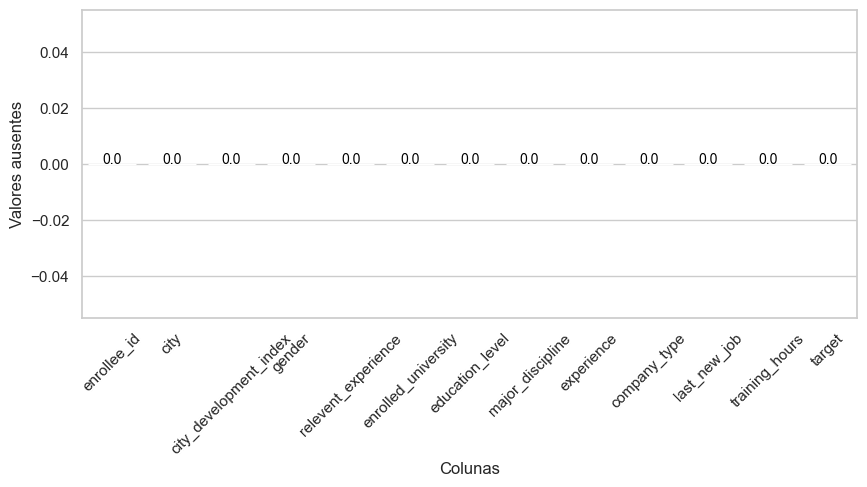

In [506]:
df_Nulos = df_Train.isna().sum().reset_index()

figNulos = plt.figure(figsize=(10, 4))

ax = sns.barplot(data= df_Nulos, x= 'index', y= 0, palette='tab10')
plt.xlabel('Colunas')
plt.xticks(rotation= 45)
plt.ylabel('Valores ausentes')

for c in ax.patches:
    ax.annotate(f'\n{c.get_height()}', (c.get_x()+0.4, (c.get_height())), ha='center', color='black', size=10)

In [507]:
df_Train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Other,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,Other,never,83,0.0
3,33241,city_115,0.789,Other,No relevent experience,no_enrollment,Graduate,Business Degree,<1,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Other,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Other,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Non Degree,<1,Pvt Ltd,2,97,0.0


#### Tratamentos pontuais

1. Ajuste da coluna e valores de 'relevent_experience' para 'relevant_experience'.
2. Ajuste dos valores da coluna 'enrolled_university' de 'no_enrollment' para 'no enrollment'.
3. Retirada da coluna 'city', pois não agrega em nossa análise, visto que apenas a métrica CDI está sendo utilizada.
4. Ajuste dos valores da coluna 'experience':
    - '<1' para '0';
    - '>20' para '21'
5. Ajuste de valor na coluna 'last_new_job':
    - '>4' para '5'
    - 'never' para '0'


In [508]:
# 1. Ajuste da coluna e valores de 'relevent_experience' para 'relevant_experience'.
#Coluna
df_Train = df_Train.rename(columns={'relevent_experience': 'relevant_experience'})

#Valores
df_Train['relevant_experience'] = df_Train['relevant_experience'].replace(
    {'Has relevent experience': 'Has relevant experience', 
     'No relevent experience': 'No relevant experience'}
)

# 2. Ajuste dos valores da coluna 'enrolled_university' de 'no_enrollment' para 'no enrollment'.
df_Train['enrolled_university'] = df_Train['enrolled_university'].replace(
    {'no_enrollment': 'no enrollment'}
)

# 3. Retirada da coluna 'city', pois não agrega em nossa análise, visto que apenas a métrica CDI está sendo utilizada.
df_Train = df_Train.drop(columns={'city'})

In [509]:
# 4. Ajuste dos valores da coluna 'experience':
#    - '<1' para '0';
#    - '>20' para '21'
df_Train['experience'] = df_Train['experience'].replace(
    {'<1': '0',
     '>20': '21'}
)

#5. Ajuste de valor na coluna 'last_new_job':
#    - '>4' para '5'
#    - 'never' para '0'
df_Train['last_new_job'] = df_Train['last_new_job'].replace(
    {'>4': '5',
     'never': '0'}
)


#### Ajuste de tipagem:
- *'experience', 'last_new_job' e 'training_hours'*: de 'object' para 'float64'

In [510]:
df_Train['experience'] = df_Train['experience'].astype('float64')
df_Train['last_new_job'] = df_Train['last_new_job'].astype('float64')
df_Train['training_hours'] = df_Train['training_hours'].astype('float64')

## Análise Exploratória

In [511]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19093 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19093 non-null  int64  
 1   city_development_index  19093 non-null  float64
 2   gender                  19093 non-null  object 
 3   relevant_experience     19093 non-null  object 
 4   enrolled_university     19093 non-null  object 
 5   education_level         19093 non-null  object 
 6   major_discipline        19093 non-null  object 
 7   experience              19093 non-null  float64
 8   company_type            19093 non-null  object 
 9   last_new_job            19093 non-null  float64
 10  training_hours          19093 non-null  float64
 11  target                  19093 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.9+ MB


#### Distribuição de valores por colunas categóricas

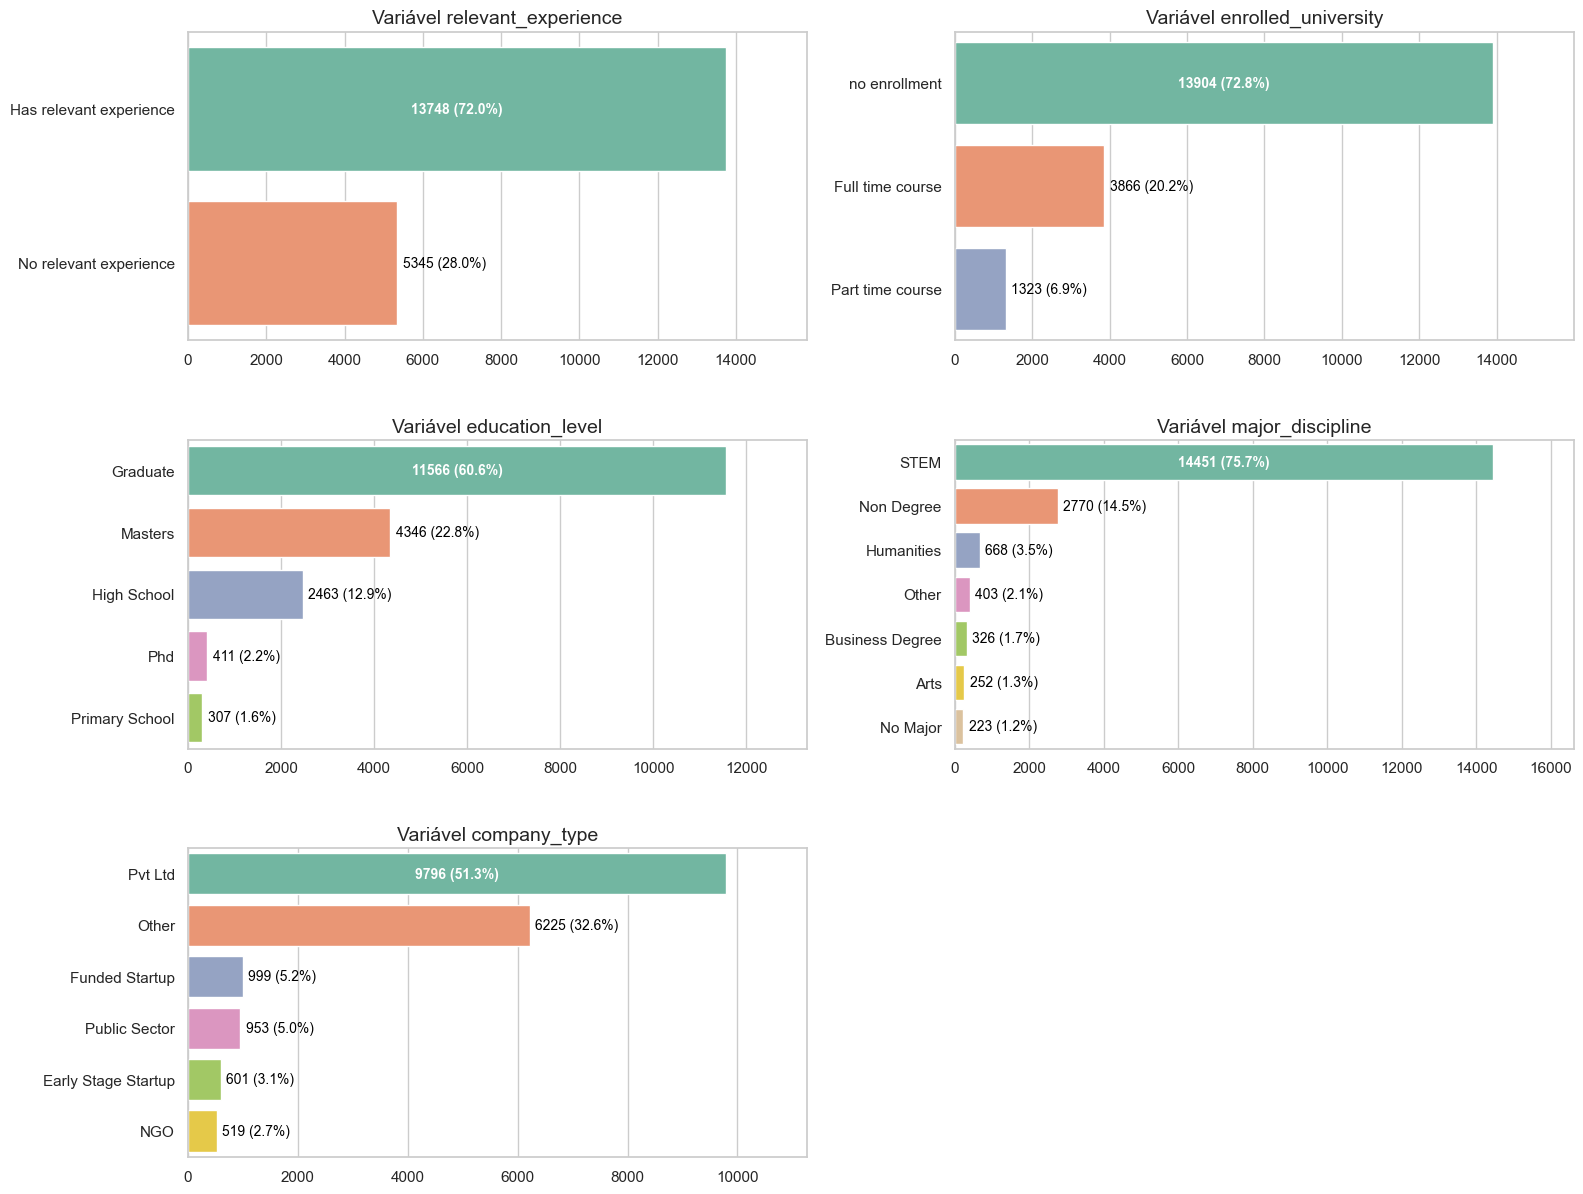

In [520]:
plt.figure(figsize=(16, 20))

lista_colunas = ['relevant_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_type']

for A, col in enumerate(lista_colunas, start=1):
    plt.subplot(5, 2, A)

    # Frequência absoluta e percentual
    freq_abs = df_Train[col].value_counts()
    freq_pct = df_Train[col].value_counts(normalize=True) * 100

    # Ordenação decrescente
    freq_abs = freq_abs.sort_values(ascending=False)
    freq_pct = freq_pct.loc[freq_abs.index]

    ax = sns.barplot(x=freq_abs.values, y=freq_abs.index, palette="Set2")

    max_val = max(freq_abs.values)

    # Pega o limite máximo do eixo X após plotar
    ax.set_xlim(0, max(freq_abs.values) * 1.15)  # Garantindo que tem espaço para valores externos
    xlim_max = ax.get_xlim()[1]

    # Anotando os valores nas barras
    for i, (v, p) in enumerate(zip(freq_abs.values, freq_pct.values)):
        if v > 0.85 * xlim_max:  # Se percentual for grande, escreve dentro da barra
            ax.text(v * 0.5, i, f'{v} ({p:.1f}%)', va='center', ha='center', color='white', fontsize=10, fontweight='bold')
        else:  # Senão, escreve fora
            ax.text(v + max_val * 0.01, i, f'{v} ({p:.1f}%)', va='center', ha='left', color='black', fontsize=10)

    plt.title(f'Variável {col}', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout(h_pad=3)
plt.show()


#### Avaliando individualmente os gráficos com as variáveis categóricas, podemos tirar algumas conclusões:

- Predominância de candidatos do sexo masculino.
- A maioria dos profissionais possui uma experiência relevante. É natural supor que candidatos voltados a treinamentos avançados contem com alguma trajetória profissional anterior.
- Grande parte não está atualmente matriculada em cursos de graduação, o que sugere que muitos já concluíram essa etapa e estão voltados para especializações.
- O nível educacional predominante é a graduação completa, reforçando o perfil qualificado dos candidatos.
- A área de formação mais comum é STEM, abrangendo cursos das áreas de tecnologia e exatas.
- Destaca-se também que boa parte dos candidatos possui mais de 20 anos de experiência (17,2%), o que reforça um perfil com trajetória profissional sólida.
- Por fim, é importante destacar que os candidatos possuem um período curto de desemprego.

#### Histogramas das colunas numéricas


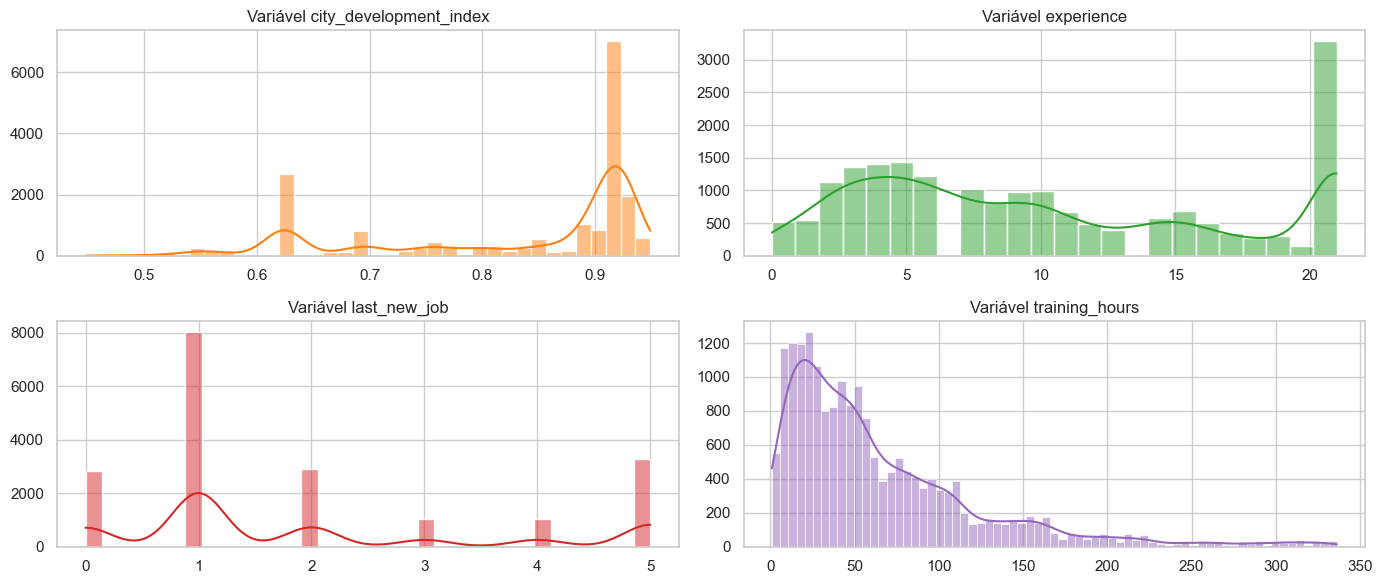

In [513]:
plt.figure(figsize=(14, 6))
cores = sns.color_palette('tab10')

lista_colunas = ['city_development_index', 'experience', 'last_new_job', 'training_hours']

for A, col in enumerate(lista_colunas, start=1):
    plt.subplot(2, 2, A)
    sns.histplot(df_Train[col], kde=True, color=cores[A % len(cores)])
    plt.title(f'Variável {col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


#### Avaliando os histogramas da variáveis numéricas é possível notar:

- A distribuição do CDI apresenta uma concentração significativa em regiões com índice próximo a 0.9, o que indica uma predominância de áreas com melhor infraestrutura e oportunidades.
- Observam-se também grupos em regiões com menor índice de desenvolvimento (< 0.7), revelando diversidade no perfil geográfico dos candidatos
- O histórico de último emprego destaca os candidatos que mudaram de emprego recentemente (há 1 ano ou menos), o que pode indicar dinamismo ou instabilidade no mercado.
- A distribuição das horas de treinamento é assimétrica, com concentração até 50 horas, evidenciando a prevalência de capacitações de curta duração.
- Além disso, treinamentos mais extensos são menos frequentes, embora ainda representem um número relevante de candidatos com mais de 100 horas.

O padrão geral sugere um perfil majoritário com acesso a boas condições urbanas e foco em qualificações rápidas e objetivas, com movimentações frequentes no histórico profissional.

## Criação de modelo para filtragem de rankeamento de candidatos

In [514]:
df_Train.head()

,enrollee_id,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,8949,0.920,Male,Has relevant experience,no enrollment,Graduate,STEM,21.0,Other,1.0,36.0,1.0
1,29725,0.776,Male,No relevant experience,no enrollment,Graduate,STEM,15.0,Pvt Ltd,5.0,47.0,0.0
2,11561,0.624,Other,No relevant experience,Full time course,Graduate,STEM,5.0,Other,0.0,83.0,0.0
3,33241,0.789,Other,No relevant experience,no enrollment,Graduate,Business Degree,0.0,Pvt Ltd,0.0,52.0,1.0
4,666,0.767,Male,Has relevant experience,no enrollment,Masters,STEM,21.0,Funded Startup,4.0,8.0,0.0


#### Com base no tratamento dos dados e em uma análise exploratória preliminar, será aplicado um filtro alinhado ao perfil desejado pela empresa. Esse filtro permitirá classificar os candidatos em três níveis, gerando um arquivo Excel com os resultados. A proposta é estabelecer um ranking de acordo com critérios técnicos e comportamentais relevantes, conforme abaixo:
- Nível 1 – Candidatos com alto grau de aderência ao perfil ideal (preferenciais para o processo seletivo atual).
- Nível 2 – Candidatos com potencial para a vaga, considerando também oportunidades futuras.
- Nível 3 – Candidatos que atualmente não atendem aos critérios essenciais definidos para a vaga.

#### Colunas:
- *enrolle_id, city e gender*\
Variáveis indiferentes, logo, não terão relevância em nosso filtro.

- *city_development_index*\
Índice de desenvolvimento da cidade de residência do candidato
    - Acima de 0.81 - Candidato nível 1
    - 0.8 a 0.51 - Candidato nível 2
    - Abaixo de 0.5 - Candidato nível 3
    
- *relevant_experience*\
Indica se o candidato já possui experiência relevante na área.
    - Has revelant experience - Candidato nível 1
    - No relevant experience - Candidato nível 3

- *enrolled_university*\
Situação atual do candidato em relação à graduação.
    - no_enrollment - Candidato nível 1 (Já concluído, apto a especializações)
    - Part time course ou no_enrollment - Candidato nível 2
    - Full time course - Candidato nível 3

- *education_level*\
Nível educacional mais alto alcançado.
    - Phd ou Masters - Candidato nível 1
    - Graduate - Candidato nível 2
    - Primary ou High School - Candidato nível 3

- *major_discipline*\
Área de formação principal.
    - STEM ou Business Degree - Candidato nível 1 (Candidatos de áreas tecnológicas, exatas ou então de entendimento de negócios/ramo empresarial)
    - Qualquer área de formação - Candidato nível 2
    - No major ou Non Degree - Candidato nível 3

- *experience*\
Tempo total de experiência profissional.
    - 10 a 20+ (anos de experiência) - Candidato nível 1
    - 3 a 10 (anos de experiência) - Candidato nível 2
    - Abaixo de 3 (anos de experiência) - Candidato nível 3

- *company_type*\
Tipo de empresa onde o candidato já atuou.
    - Pvt Ltd, Funded Startup ou Early Stage Startup - Candidato nível 1 (Candidatos já no meio empresarial e com entendimento de negócios)
    - Qualquer tipo de empresa - Candidato nível 2

- *last_new_job*\
Tempo desde o último emprego (diferença em anos do último emprego ao atual).
    - 3, 4 ou 4+ - Candidato nível 1 - Reflete profissionais que permanecem por vários anos na mesma empresa, o que pode agregar valor ao perfil
    - 1 ou 2 - Candidato nível 2 - Profissionais que podem vir a ficar por anos na mesma empresa, ou então que trocam de emprego anualmente.
    - Never - Candidato nível 3 (Sem histórico de trabalho anterior)

- *training hours*\
Quantidade de horas de treinamento.
    - 50 a 200 (horas de treinamento) - Candidato nível 1 (Bom nível de capacitação ténica)
    - 200+ (horas de treinamento) - Candidato nível 2 (Tempo excessivo pode indicar pouca prática)
    - < 50 (horas de treinamento) - Candidato nível 3 

- *target*\
Indica se o candidato está buscando uma recolocação.
    - 1 - Candidato nível 1 (Ativamente buscando oportunidades)
    - 0 - Candidato nível 3 (Sem interesse atual em novas vagas)

#### Com os indicadores definidos, vamos criar o filtro para o rankeamento dos candidatos

In [515]:
df_Train

,enrollee_id,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,8949,0.920,Male,Has relevant experience,no enrollment,Graduate,STEM,21.0,Other,1.0,36.0,1.0
1,29725,0.776,Male,No relevant experience,no enrollment,Graduate,STEM,15.0,Pvt Ltd,5.0,47.0,0.0
2,11561,0.624,Other,No relevant experience,Full time course,Graduate,STEM,5.0,Other,0.0,83.0,0.0
3,33241,0.789,Other,No relevant experience,no enrollment,Graduate,Business Degree,0.0,Pvt Ltd,0.0,52.0,1.0
4,666,0.767,Male,Has relevant experience,no enrollment,Masters,STEM,21.0,Funded Startup,4.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,Male,No relevant experience,no enrollment,Graduate,Humanities,14.0,Other,1.0,42.0,1.0
19154,31398,0.920,Male,Has relevant experience,no enrollment,Graduate,STEM,14.0,Other,4.0,52.0,1.0
19155,24576,0.920,Male,Has relevant experience,no enrollment,Graduate,STEM,21.0,Pvt Ltd,4.0,44.0,0.0
19156,5756,0.802,Male,Has relevant experience,no enrollment,High School,Non Degree,0.0,Pvt Ltd,2.0,97.0,0.0


In [516]:
candidatos_nivel_1 = (
    (df_Train['city_development_index'] > 0.8) &
    (df_Train['relevant_experience'] == 'Has relevant experience') &
    (df_Train['enrolled_university'] == 'no enrollment') &
    (df_Train['education_level'].isin(['Phd', 'Masters'])) &
    (df_Train['major_discipline'].isin(['STEM', 'Business Degree'])) &
    (df_Train['experience'].between(10, 21)) &
    (df_Train['company_type'].isin(['Pvt Ltd', 'Funded Startup', 'Early Stage Startup'])) &
    (df_Train['last_new_job'].isin([3.0, 4.0, 5.0])) &
    (df_Train['training_hours'].between(50, 200)) &
    (df_Train['target'] == 1)
)

CandidatosNivel1 = df_Train[candidatos_nivel_1].reset_index(drop=True)
CandidatosNivel1

,enrollee_id,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,33254,0.920,Female,Has relevant experience,no enrollment,Masters,STEM,21.0,Pvt Ltd,5.0,120.0,1.0
1,12224,0.920,Male,Has relevant experience,no enrollment,Masters,STEM,21.0,Pvt Ltd,5.0,59.0,1.0
2,6110,0.926,Male,Has relevant experience,no enrollment,Masters,STEM,21.0,Pvt Ltd,5.0,74.0,1.0
3,21325,0.897,Male,Has relevant experience,no enrollment,Masters,STEM,19.0,Pvt Ltd,4.0,88.0,1.0
4,10084,0.895,Female,Has relevant experience,no enrollment,Masters,STEM,21.0,Pvt Ltd,5.0,156.0,1.0
5,9939,0.920,Other,Has relevant experience,no enrollment,Masters,STEM,19.0,Pvt Ltd,5.0,56.0,1.0
6,3399,0.887,Male,Has relevant experience,no enrollment,Masters,STEM,10.0,Pvt Ltd,4.0,67.0,1.0
7,30999,0.920,Male,Has relevant experience,no enrollment,Masters,STEM,14.0,Pvt Ltd,3.0,55.0,1.0
8,5339,0.925,Male,Has relevant experience,no enrollment,Masters,STEM,16.0,Pvt Ltd,5.0,108.0,1.0
9,9629,0.920,Male,Has relevant experience,no enrollment,Masters,STEM,14.0,Pvt Ltd,4.0,166.0,1.0


In [517]:
filtro_nivel_2 = (
    (df_Train['city_development_index'].between(0.51, 0.8)) &
    (df_Train['enrolled_university'].isin(['Part time course', 'no enrollment'])) &
    (df_Train['education_level'] == 'Graduate') &
    (df_Train['experience'].between(3, 9)) &
    (df_Train['last_new_job'].isin([2.0, 1.0])) &
    (df_Train['training_hours'] > 200) &
    (df_Train['target'] == 1)
)

CandidatosNivel2 = df_Train[filtro_nivel_2].reset_index(drop=True)
CandidatosNivel2

,enrollee_id,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,19560,0.698,Male,No relevant experience,no enrollment,Graduate,STEM,3.0,Other,1.0,326.0,1.0
1,6511,0.624,Other,Has relevant experience,no enrollment,Graduate,STEM,5.0,Pvt Ltd,1.0,304.0,1.0
2,11045,0.624,Other,Has relevant experience,no enrollment,Graduate,STEM,3.0,Other,1.0,284.0,1.0
3,19544,0.624,Male,Has relevant experience,no enrollment,Graduate,STEM,3.0,Pvt Ltd,2.0,258.0,1.0
4,7580,0.789,Male,Has relevant experience,no enrollment,Graduate,STEM,8.0,Pvt Ltd,1.0,212.0,1.0
5,12615,0.550,Male,Has relevant experience,no enrollment,Graduate,STEM,5.0,Pvt Ltd,1.0,228.0,1.0
6,8945,0.766,Other,Has relevant experience,no enrollment,Graduate,STEM,6.0,Pvt Ltd,2.0,282.0,1.0
7,19910,0.754,Male,Has relevant experience,Part time course,Graduate,STEM,7.0,Other,1.0,290.0,1.0
8,9553,0.624,Female,Has relevant experience,no enrollment,Graduate,STEM,8.0,Pvt Ltd,2.0,220.0,1.0
9,32999,0.624,Male,Has relevant experience,Part time course,Graduate,STEM,3.0,Pvt Ltd,2.0,328.0,1.0


In [518]:
IndicesNivel1Nivel2 = pd.concat([CandidatosNivel1, CandidatosNivel2]).index

CandidatosNivel3 = df_Train[~df_Train.index.isin(IndicesNivel1Nivel2)]
CandidatosNivel3

,enrollee_id,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
21,19061,0.926,Male,Has relevant experience,no enrollment,Masters,STEM,11.0,Pvt Ltd,2.0,50.0,0.0
22,6491,0.804,Other,Has relevant experience,no enrollment,Masters,STEM,10.0,Other,1.0,48.0,0.0
23,7041,0.776,Male,Has relevant experience,no enrollment,Graduate,Humanities,0.0,Pvt Ltd,1.0,65.0,0.0
24,22767,0.624,Other,Has relevant experience,no enrollment,Graduate,STEM,5.0,Pvt Ltd,1.0,13.0,0.0
25,14505,0.855,Other,No relevant experience,no enrollment,High School,Non Degree,4.0,Other,0.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,Male,No relevant experience,no enrollment,Graduate,Humanities,14.0,Other,1.0,42.0,1.0
19154,31398,0.920,Male,Has relevant experience,no enrollment,Graduate,STEM,14.0,Other,4.0,52.0,1.0
19155,24576,0.920,Male,Has relevant experience,no enrollment,Graduate,STEM,21.0,Pvt Ltd,4.0,44.0,0.0
19156,5756,0.802,Male,Has relevant experience,no enrollment,High School,Non Degree,0.0,Pvt Ltd,2.0,97.0,0.0


In [519]:
#Exportando as tabelas geradas em formato .xlsx
CandidatosNivel1.to_excel("Resultados/CandidatosNivel1.xlsx", index=False)
CandidatosNivel2.to_excel("Resultados/CandidatosNivel2.xlsx", index=False)
CandidatosNivel3.to_excel("Resultados/CandidatosNivel3.xlsx", index=False)

*A base de candidatos classificados como Nível 3 contempla todos os perfis que não atenderam aos critérios estabelecidos para os Níveis 1 e 2. Esses candidatos serão mantidos em nossa base para futuras oportunidades, e poderão ser reavaliados por meio de modelos de Machine Learning, com o objetivo de identificar possíveis melhorias e recomendações personalizadas para futuras candidaturas*

## Relatório Final

Com base em nossa análise, identificamos categorias que são as mais relevantes para a identificação de um candidato promissor:
- Experiência prévia
- Nível educacional
- Participação de cursos universitários/capacitação
- Área de estudo na graduação (quando aplicável)
- Tipo de empresa em que o candidato trabalha ou trabalhou

Por outro lado, identificamos algumas categorias que não demonstram tanta ou nenhuma relevância para o candidato:
- Gênero
- Tamanho da empresa que trabalha
- Código da cidade 

## Recomendações

Recomendamos que o time de Recursos Humanos implemente um processo contínuo de coleta e enriquecimento de dados, de forma a melhorar a qualidade e a completude das informações dos candidatos. 

Além disso, sugere-se o uso de modelos de Machine Learning para reavaliar periodicamente os perfis classificados como Nível 3, possibilitando a identificação de melhorias e possíveis reclassificações com base em novas informações.

Por fim, é recomendado que o RH concentre esforços na atração de candidatos com alto potencial, mas que ainda não demonstraram intenção clara de mudança de emprego, otimizando os investimentos em treinamento e recrutamento.

Esperamos que essas recomendações sejam úteis para aprimorar o processo de seleção da empresa e seus treinamentos.